## Advertising Sales Dataset

**Objetivo**: Realizar recomendações para impulsionar o crescimento de vendas da empresa.

A publicidade é fundamental para empresas, sendo o meio essencial para promover produtos e serviços e atrair clientes. Contudo, os custos de uma campanha publicitária podem ser significativos e as empresas necessitam analisar a efetividade de suas campanhas publicitárias. 

Sendo assim, a previsão de vendas é um fator fundamental para as empresas pois fornece insights cruciais sobre a receita esperada originada de suas campanhas promocionais.

A regressão linear é uma técnica estística que tem como objetivo prever o valor de uma variável dependente com base no valor de outra variável independente. A regressão auxilia a identificar uma linha reta que melhor se ajusta aos dados. 






# Regressão Linear Simples

## 1. Entendimento dos dados
        

Import das bibliotecas 

In [176]:
# Bibliotecas padrão
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Pré-processamento e construção do modelo
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

# Avaliação do modelo
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



Carregamento e exploração do Dataset

In [177]:
#Carregamento dos dados
df = pd.read_csv('Advertising Budget and Sales.csv', index_col=0)
df.shape
df.head()


,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [178]:
#Renomeando os nomes das colunas

columns_names = {
    'TV Ad Budget ($)': 'TV',
    'Radio Ad Budget ($)': 'Radio',
    'Newspaper Ad Budget ($)': 'Newspaper',
    'Sales ($)': 'Sales'
}

df = df.rename(columns=columns_names)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


O Dataset possui 4 colunas, as colunas TV, Radio,Newspaper são as variáveis independentes e a coluna Sales é a variável dependente (preditora)

In [179]:
# Verificando se existe dados nulos

df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

É importante garantir que os dados não contenha valores nulos, pois a regressão não irá funcionar se algum dos dados tiverem valores nulos

In [180]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## 2.Vizualização dos dados

A análise de correlação é um passo fundamental na construção de modelos. Ela nos permite revelar as relações entre as variáveis ​​independentes e dependentes. Sendo assim, iremos identificar quais variáveis se correlacionam mais com vendas

<AxesSubplot:>

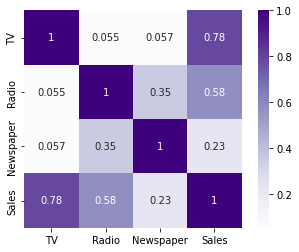

In [181]:
corr = df.corr()
sns.heatmap(corr, square=True,
            cmap='Purples', annot=True
            )


Text(0.5, 1.0, 'Correlação dos Canais x Vendas')

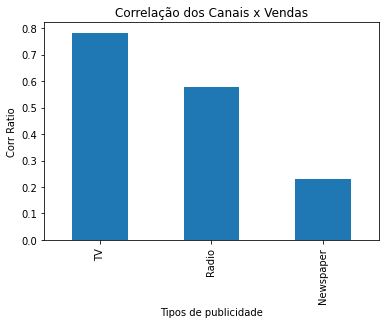

In [182]:
df.corr()['Sales'][:3].plot(kind='bar')
plt.xlabel('Tipos de publicidade')
plt.ylabel('Corr Ratio')
plt.title('Correlação dos Canais x Vendas')

Observando o mapa de calor e o gráfico de barras acima, podemos observar que a variável TV apresenta uma maior correlação com a variável dependente Sales. Portanto, a TV será a variável independente (X) considerada e Sales (y) como preditora

c:\Users\leoar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


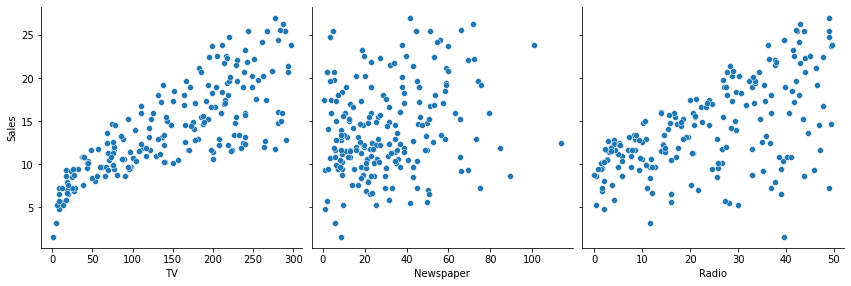

In [183]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',
             size=4, aspect=1, kind='scatter')
plt.show()

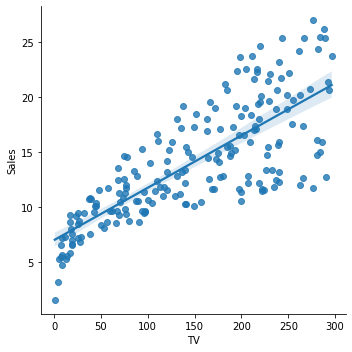

In [184]:
sns.lmplot(x='TV', y='Sales', 
           data=df
           )

A correlação entre Sales e TV apresenta ser mais linear 

# 3. Preparação dos dados para modelagem e predição

In [185]:
# Separando os dados
X = df[['TV']]
y = df.Sales

Precisamos separar os dados em treinamento e testes antes e realizar o treinamento do modelo. Iremos utilizar 20% do conjunto para teste e os outros 80% para treinamento.

In [186]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 1)
(160,)
(40, 1)
(40,)


Construção e treinamento

In [187]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [188]:
model.score(X_test, y_test)


0.6766954295627076

Valores de coeficiente e interceptação do modelo

**Coeficientes**:

Diz quanto a variável dependente muda quando você muda a variável independente em uma unidade.

Indica quanto a variável dependente muda em resposta a uma mudança de uma unidade na variável independente, mantendo as outras variáveis constantes.

**Interceptação**:

Representa o valor da variável dependente quando todas as variáveis ​​independentes são iguais a zero.

Pode ser interpretado como o efeito base ou o valor inicial da variável dependente.

In [189]:
print(model.coef_)
print(model.intercept_)

[0.04652973]
7.119638430592953


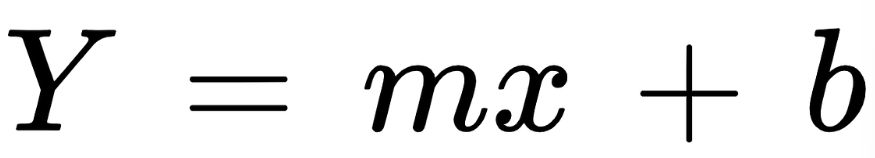

A equação da regressão linear, representada como y=mx+b, descreve a relação linear entre duas variáveis, onde:

**y** é a variável dependente que desejamos prever.

**x** é a variável independente, o valor de entrada.

**m** é a inclinação da linha de regressão, que representa a taxa de variação da variável dependente em relação à variável independente.

**b** é a interceptação no eixo y, indicando o valor de y quando x é 0


Exemplo: Quero prever quantas vendas irei obter caso o meu valor do orçamento para publicidade na TV for de $10

In [190]:
model.predict([[10]])

c:\Users\leoar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.58493577])

In [191]:
y_pred = model.predict(X_test)
y_pred

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877,
       10.61402143, 17.2072847 ,  9.44612512, 17.46785121, 15.2669948 ,
        8.58532504,  9.73460946, 18.03086098,  7.37089899, 13.61053628,
       15.03899911,  7.45930549, 16.31391381, 10.62332738, 18.16579721,
       17.79821232, 10.27435438,  8.88776831, 18.79394862, 10.33019006,
        9.60897918, 17.05373658, 13.60123034, 11.17703121,  7.51048819,
       16.41627922, 10.339496  , 16.37440246,  7.90599093, 20.18053468,
       18.203021  ,  9.36702457, 19.85482655, 12.57292322,  8.39920611])

In [192]:
comparison= pd.DataFrame({ 
    'Real': y_test.values.flatten(), 
    'Predict': y_pred.flatten() 
}) 

comparison.head(10)

,Real,Predict
0,16.9,14.717944
1,22.4,16.211548
2,21.4,20.748197
3,7.3,7.664036
4,24.7,17.370139
5,12.6,10.614021
6,22.3,17.207285
7,8.4,9.446125
8,11.5,17.467851
9,14.9,15.266995


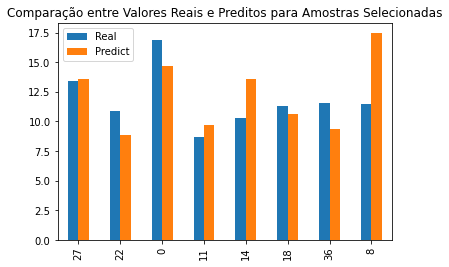

In [193]:
ax = comparison.sample(8).plot(kind='bar') # amostra de 8 linhas
ax.set_title('Comparação entre Valores Reais e Preditos para Amostras Selecionadas')
plt.show()


Podemos observar que a diferança entre os dados reais e previstos não são muito diferentes.

## 4.Avaliação do modelo

In [194]:
from sklearn.metrics import classification_report, confusion_matrix

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.6766954295627076
MAE: 2.444420003751042
MSE: 10.204654118800956
RMSE: 3.194472431998898


R2: Indica o quão bem o modelo se ajusta aos dados, representando a proporção da variabilidade da variável dependente explicada pelas variáveis independentes.
Intervalo de valores: Varia de 0 a 1. Quanto mais próximo de 1, melhor o modelo.
No caso, um R² de 0.6766 sugere que seu modelo explica aproximadamente 67% da variabilidade nos dados. 

MAE (Mean Absolute Error): É a média das diferenças absolutas entre os valores previstos e os valores reais.O modelo obteve 2.4444 significa que, em média, as previsões do seu modelo estão erradas em cerca de 2.44 unidades.

MSE (Mean Squared Error): Média dos erros ao quadrado entre previsões e valores reais.
Interpretação: Dá mais peso a grandes erros. Quanto maior o MSE, maior é a dispersão dos erros.

RMSE (Root Mean Squared Error): O RMSE é a raiz quadrada do MSE. Essa métrica é mais fácil de interpretar, pois é expressa nas mesmas unidades da variável-alvo.
RMSE de 3.1944 implica que, em média, as previsões do seu modelo diferem dos valores reais em cerca de 3,19 unidades.

# Regressão Linear Múltipla

A regressão linear múltipla reconhece que as vendas não dependem apenas da TV. Rádio e newsletters também podem ter um impacto significativo. Ao considerar essa multiplicidade de influências, o modelo torna-se mais preciso e confiável na previsão dos resultados.

Para verificar o resultado, precisamos adicionar as variáveis independentes no código:

As 2 principais variáveis ​​preditoras baseadas na análise acima são: TV e Rádio. Então vamos verificar se a combinação dessas variáveis ​cria um modelo melhor.

In [195]:
X = df[['TV', 'Radio' ]] 
y = df.Sales

In [196]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 2)
(160,)
(40, 2)
(40,)


In [197]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [198]:
model.score(X_test, y_test)

0.9005833101920356

# Conclusão

A pontuação obtida na regressão linear múltipla são: 0.9005833101920356, ou seja, o valor da precisão aumentou quando incluimos a variável "Radio" no modelo. Sendo assim, essa pontuação foi melhor do que a do modelo anterior em que utilizamos apenas uma variável e o score foi de 0.6766954295627076.

Isso significa que a publicidade na TV  e Rádio são as que mais contribui nas vendas, já no jornal, tem pouco efeito nas vendas. Sendo assim, podemos dizer que com base nessa análise o profissional responsável pelas campanhas deve alocar mais recursos para a TV e Rádio.